<a href="https://colab.research.google.com/github/andilugo/Actividad_Evaluable_Mapasdecaloryboxplots/blob/main/UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UF-6 Actividad Evaluable: Mapas de calor y boxplots

**Equipo:**

Andrea Cosset Hernández Lugo A01707744

Nicole Aryam Rodríguez A00831569

Natalia María Ovando Flores A01368118

Lucía Castañeda Medeguín A01706644

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
# Set plots as "static" embeddedings in the notebook
%matplotlib inline
import plotly.express as px

In [ ]:
# Datos
facturacion= pd.read_csv('merge1_limpio.csv')
clientes= pd.read_csv('merge2_limpio.csv')
gyc= pd.read_csv('gastosycostos_limpio.csv', index_col=0)

# Merge 1 

In [ ]:
facturacion.head()

,Clave Factura,Clave Cliente,Status,Clave Vendedor,Fecha Elab,Fecha Doc_x,Fecha Vencimiento,Fecha Cancelacion,Cantidad,Descuento,...,Clave Articulo,Descr,PrecioU,CostoU,CostoUCal,Subtotal,CostoT,MargenU,MargenT,grado_qcut
0,F37034,5926,E,2,24:34.3,05/01/22,05/01/22,ND,434.4800,0.0,...,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68,D
1,F37036,8483,E,2,31:12.1,05/01/22,05/01/22,ND,1264.0500,0.0,...,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,C
2,F37041,8316,E,3,17:31.2,05/01/22,05/01/22,ND,3861.2917,0.0,...,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,B
3,F37042,5100,E,3,19:47.3,05/01/22,05/01/22,ND,140.0000,0.0,...,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04,D
4,F37043,5926,E,2,24:38.6,05/01/22,05/01/22,ND,818.9680,0.0,...,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41,D


In [ ]:
facturacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clave Factura      1424 non-null   object 
 1   Clave Cliente      1424 non-null   object 
 2   Status             1424 non-null   object 
 3   Clave Vendedor     1424 non-null   int64  
 4   Fecha Elab         1424 non-null   object 
 5   Fecha Doc_x        1424 non-null   object 
 6   Fecha Vencimiento  1424 non-null   object 
 7   Fecha Cancelacion  1424 non-null   object 
 8   Cantidad           1424 non-null   float64
 9   Descuento          1424 non-null   float64
 10  Total              1424 non-null   float64
 11  Fecha Doc_y        1424 non-null   object 
 12  NombreV            1424 non-null   object 
 13  NombreC            1424 non-null   object 
 14  CantidadA          1424 non-null   int64  
 15  Clave Articulo     1424 non-null   object 
 16  Descr              1424 

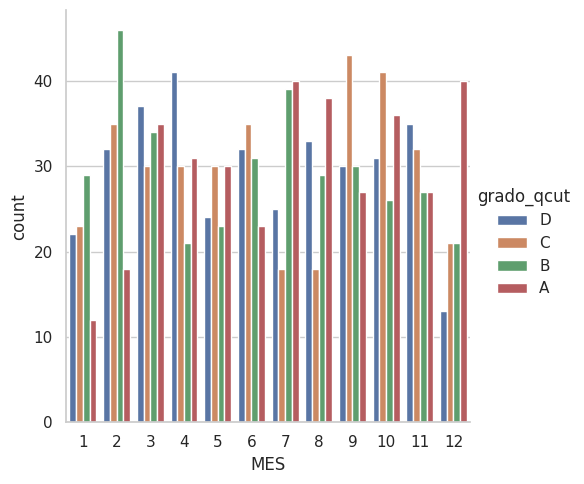

In [ ]:
facturacion['Fecha Doc_x'] = pd.to_datetime(facturacion['Fecha Doc_x'])
facturacion['MES'] = facturacion['Fecha Doc_x'].dt.month
sns.catplot(data=facturacion, x='MES', kind='count',hue = 'grado_qcut', order=range(1,13))

In [ ]:
aeliminar=['PrecioU','CostoU','CostoUCal','MargenU']
factlimp=facturacion.drop(aeliminar,axis=1)

<ipython-input-11-e4b539a28852>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=factlimp.corr(), annot=True, cmap='hot', linewidth=1).set(title='Correlation coefficients')


[Text(0.5, 1.0, 'Correlation coefficients')]

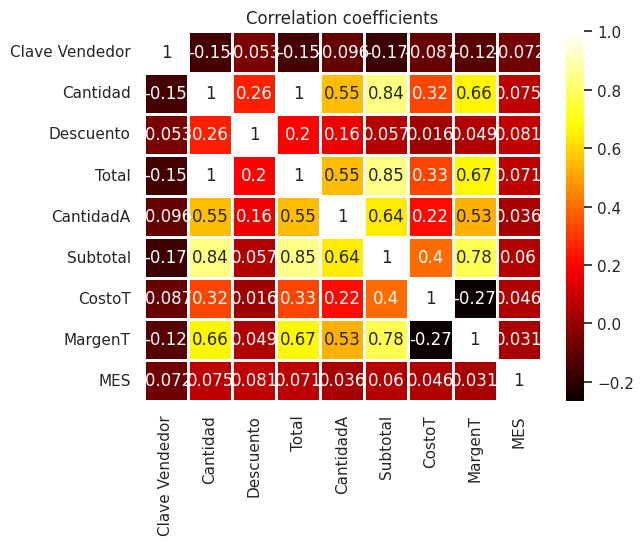

In [ ]:
sns.heatmap(data=factlimp.corr(), annot=True, cmap='hot', linewidth=1).set(title='Correlation coefficients')

In [ ]:
totalporcliente = factlimp.groupby('Clave Cliente')['Total'].sum()
totalporcliente = totalporcliente.to_frame()
totalporcliente = totalporcliente.reset_index()

In [ ]:
totalporcliente

,Clave Cliente,Total
0,1016,22461.00
1,1053,85569.70
2,1089,527.59
3,1130,2256.40
4,1181,370.52
...,...,...
486,93,11169.00
487,95,1369.18
488,9566,375.00
489,9574,805.50


In [ ]:
df_ordenado = totalporcliente.sort_values('Total', ascending=False)

In [ ]:
top_10_clientes = df_ordenado.head(10)

In [ ]:
bar_fig = px.bar(
    data_frame= top_10_clientes,
    x= 'Total',
    y= 'Clave Cliente',
    title= 'Top 10 Clientes',
    orientation= 'h')
bar_fig.show()

In [ ]:
totalpormes = factlimp.groupby('MES')['Total'].sum()
totalpormes = totalpormes.to_frame()
totalpormes= totalpormes.reset_index()
line_graph = px.line(
    data_frame= totalpormes,
    x= 'MES',
    y= 'Total',
    title= 'Total por Mes 2022'
)
line_graph.show()

In [ ]:
mtotalpormes = factlimp.groupby('MES')['MargenT'].sum()
mtotalpormes = mtotalpormes.to_frame()
mtotalpormes= mtotalpormes.reset_index()
line_graph = px.line(
    data_frame= mtotalpormes,
    x= 'MES',
    y= 'MargenT',
    title= 'Margen Total por Mes 2022'
)
line_graph.show()

# Merge 2

In [ ]:
clientes.head()

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clave Factura  152 non-null    object 
 1   No. Cliente    152 non-null    int64  
 2   NombreC        152 non-null    object 
 3   FechaFac       152 non-null    object 
 4   FechaV         152 non-null    object 
 5   Adeudo         152 non-null    float64
 6   Vendedor       152 non-null    int64  
 7   Total          152 non-null    float64
 8   Descuento      152 non-null    float64
 9   RFC Cliente    152 non-null    object 
 10  grado_qcut     152 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 13.2+ KB


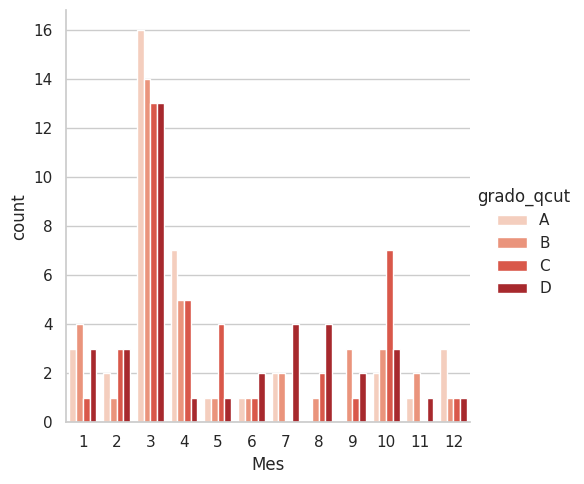

In [ ]:
clientes['FechaV'] = pd.to_datetime(clientes['FechaV'])
clientes['Mes'] = clientes['FechaV'].dt.month
sns.catplot(data=clientes, x='Mes', kind='count', hue='grado_qcut', order=range(1, 13), palette='Reds')

<ipython-input-37-23d5c6e063ae>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, 'Correlation coefficients')]

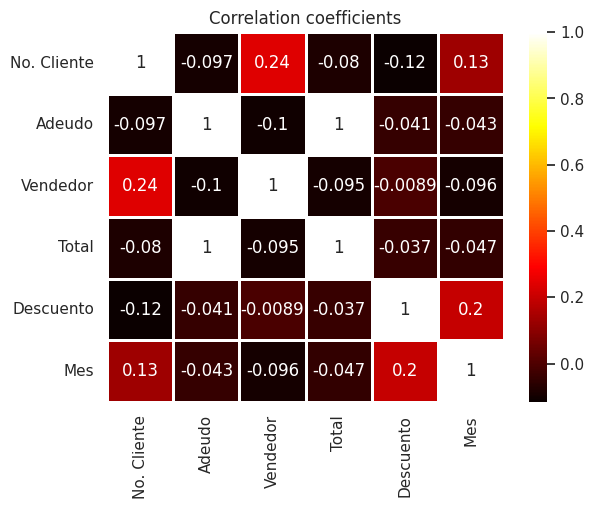

In [ ]:
sns.heatmap(data=clientes.corr(), annot=True, cmap='hot', linewidth=1).set(title='Correlation coefficients')

In [ ]:
Adeudoxcliente = clientes.groupby('NombreC')['Adeudo'].sum()
Adeudoxcliente = Adeudoxcliente.to_frame()
Adeudoxcliente = Adeudoxcliente.reset_index()
df_ordenado_clientes = Adeudoxcliente.sort_values('Adeudo', ascending=False)
top_10_clientes_deudores = df_ordenado_clientes.head(10)
top_10_clientes_deudores

,NombreC,Adeudo
28,DONGA HWASUNG MEXICO,215126.88
77,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,160363.04
8,AUTOLIV STEERING WHEELS MEXICO,131718.00
85,SIEGFRIED RHEIN,117498.51
18,CLAVOS NACIONALES C.N,111611.96
48,INDUSTRIAS LANCERMEX,87859.56
23,DEACERO,77300.96
14,BUSSMANN,61356.12
79,Q SEALS DE MEXICO,58760.32
90,TRANSPORTADORES Y FABRICACIONES INDUSTRIALES,51425.00


In [ ]:
bar_fig = px.bar(
    data_frame=top_10_clientes_deudores,
    x='Adeudo',
    y='NombreC',
    title='Top 10 Clientes Deudores',
    orientation='h',
    color='Adeudo',  # Color basado en la variable 'Adeudo'
    color_continuous_scale='reds'  # Escala de colores rojos
)
bar_fig.show()

In [ ]:
Adeudoxmes = clientes.groupby('Mes')['Adeudo'].sum()
Adeudoxmes = Adeudoxmes.to_frame()
Adeudoxmes= Adeudoxmes.reset_index()
line_graph = px.line(
    data_frame= Adeudoxmes,
    x= 'Mes',
    y= 'Adeudo',
    title= 'Adeudo por Mes 2022',
    color_discrete_sequence=['red']
)
line_graph.show()

#Gastos y Costos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
# Set plots as "static" embeddedings in the notebook
%matplotlib inline
import plotly.express as px

In [ ]:
gyc= pd.read_csv('gastosycostos_limpio.csv', index_col=0)
gyc.head()

,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS
0,2020-01-01,39408,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,Vigente
1,2020-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,Vigente
2,2020-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,Vigente
3,2020-01-01,3663,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,Vigente
4,2020-01-01,2849,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,1.0,0.00,0.00,0.0,0.0,0.00,0.00,Vigente


In [ ]:
gyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 0 to 396
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        9351 non-null   object 
 1   FOLIO        9351 non-null   object 
 2   RFC          9351 non-null   object 
 3   PROVEEDOR    9351 non-null   object 
 4   TIPO GASTO   9343 non-null   object 
 5   DESCRIPCION  9351 non-null   object 
 6   TC           9351 non-null   float64
 7   IMPORTE      9351 non-null   float64
 8   IVA          9351 non-null   float64
 9   RET ISR      9351 non-null   float64
 10  RET IVA      9351 non-null   float64
 11  TOTAL MX     9351 non-null   float64
 12  TOTAL SAT    9351 non-null   float64
 13  STATUS       9351 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


<ipython-input-5-b56101289efb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=gyc.corr(), annot=True, cmap='hot', linewidth=1).set(title='Correlation coefficients')


[Text(0.5, 1.0, 'Correlation coefficients')]

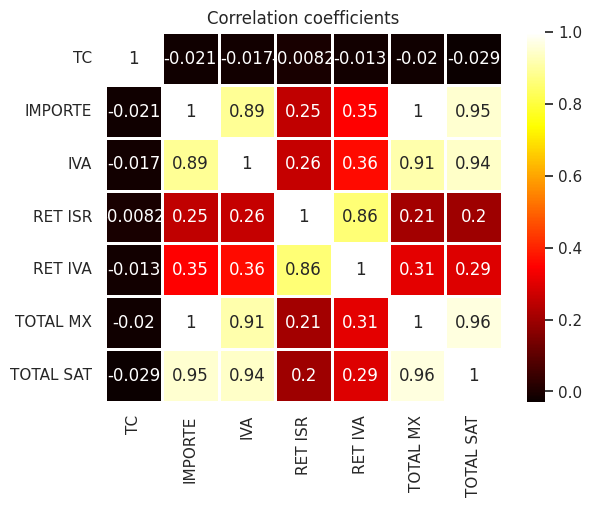

In [ ]:
sns.heatmap(data=gyc.corr(), annot=True, cmap='hot', linewidth=1).set(title='Correlation coefficients')

In [ ]:
totalTipoGasto = gyc.groupby (['PROVEEDOR', 'TIPO GASTO', 'TOTAL MX']).size().reset_index(name='COUNT')
agrupado = totalTipoGasto.groupby(['PROVEEDOR', 'TIPO GASTO']).sum()
agrupado = agrupado.reset_index()
agrupado

,PROVEEDOR,TIPO GASTO,TOTAL MX,COUNT
0,"""J&M INTERCOPY""",MTTO COMPUTO,27701.96,39
1,3D MARKET S DE RL DE CV,COMPRAS,6844.00,4
2,"ABASTECEDORA LUMEN, S.A DE C.V",PAPELERIA,1773.46,1
3,ABDUL JARED HERNANDEZ GONZALEZ,MTTO MAQUINARIA,21460.00,1
4,ABL INDUSTRIAL,COMPRAS,5742.00,1
...,...,...,...,...
762,ZARATE MONROY FRANCISCO JAVIER,COMPRAS,119.02,1
763,ZONA DIGITAL 83 SA DE CV,COMPRAS,5889.00,1
764,ifm efector S. de R.L. de C.V.,COMPRAS,7114.86,2
765,reyame s.a de c.v.,VARIOS,1199.00,1


In [ ]:
ProveedorTipoGastoOrdenado = agrupado.sort_values('TOTAL MX', ascending=False)

In [ ]:
top10ProveedorTipoGasto = ProveedorTipoGastoOrdenado.head(10)

In [ ]:
bar_fig = px.bar(
    data_frame=top10ProveedorTipoGasto,
    x='TOTAL MX',
    y='PROVEEDOR',
    title='Top 10 Proveedores y Tipo de Gasto',
    orientation='h',
    color='TIPO GASTO', 
    color_continuous_scale='reds'  
)
bar_fig.show()

In [ ]:
gyc['FECHA'] = pd.to_datetime(gyc['FECHA'])
gyc['MES'] = gyc['FECHA'].dt.month

In [ ]:
gyc['FECHA'] = pd.to_datetime(gyc['FECHA'])
gyc['AÑO'] = gyc['FECHA'].dt.year

In [ ]:
totalTipoGasto = gyc.groupby (['PROVEEDOR', 'TIPO GASTO', 'TOTAL MX']).size().reset_index(name='COUNT')
agrupado = totalTipoGasto.groupby(['PROVEEDOR', 'TIPO GASTO']).sum()
agrupado = agrupado.reset_index()
agrupado

In [ ]:
GastoMes = gyc.groupby(['MES','AÑO','TOTAL MX']).size().reset_index(name='COUNT')
agrupadoGastoMes = GastoMes.groupby(['MES','AÑO']).sum()
agrupadoGastoMes = agrupadoGastoMes.reset_index()
agrupadoGastoMes

,MES,AÑO,TOTAL MX,COUNT
0,1,2020,1.162096e+06,320
1,1,2021,1.136995e+06,269
2,1,2022,9.265237e+05,198
3,1,2023,9.101824e+05,216
4,2,2020,1.242845e+06,345
5,2,2021,1.105889e+06,279
6,2,2022,8.648983e+05,216
7,2,2023,7.507484e+05,181
8,3,2020,1.059100e+06,302
9,3,2021,1.393505e+06,314


In [ ]:
line_graph = px.line(
    data_frame= agrupadoGastoMes,
    x= 'MES',
    y= 'TOTAL MX',
    title= 'Gasto Total Mensual (2020, 2021, 2022, 2023)',
    color='AÑO', 
)
line_graph.show()

# Preguntas :

¿Hay alguna variable que no aporta información?
Si, hubieron muchas variables para análisis no eran significantes. Puesto que no daban ninguna información o era información repetida. Por ejemplo Empezamos por eliminar registros repetidos y facturas con fechas de cancelación, puesto que no nos interesaba analizarlas, ya que esas ventas nunca ocurrieron.

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Como si eliminamos, sobretodo datos repetidos, nos quedamos con datasets mucho más concisos, y generar información a partir de variables bases. Como la de Margen T, que a partir de CostoT y Total, encontramos el margen de ganancia operaivo. También eliminamos columnas como Estatus de Factura, ya que todos estaban vigentes.

¿Existen variables que tengan datos extraños?
Si, por ejemplo, habia facturas con datos negativos o con costos mucho mas alto que el ingreso total. Por ejemplo, estas últimas no las eliminamos, puesto que analizar facturas con márgenes negativos nos pareció imperativo.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
Si, la verdad como todas pueden ser ligadas por el número de factura, en nuestros 3 datasets, realmente están todas en rangos similares, haciendo nuestro análisis mucho más fácil.

¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Si, cuando encontramos estos grupos que repetían información, decidiamos eliminarlos, puesto que ambos números nos contaban la misma historia. Por ejemplo había una variable Fecha Factura y Fecha Documento, ambas con la misma fecha, por lo que se eliminaban. Si no había información extra, no se dejaba.

In [1]:
%%shell
jupyter nbconvert --to html UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb

[NbConvertApp] Converting notebook UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb to html
[NbConvertApp] Writing 1060956 bytes to UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.html
